### Reference from https://github.com/Hvass-Labs/TensorFlow-Tutorials

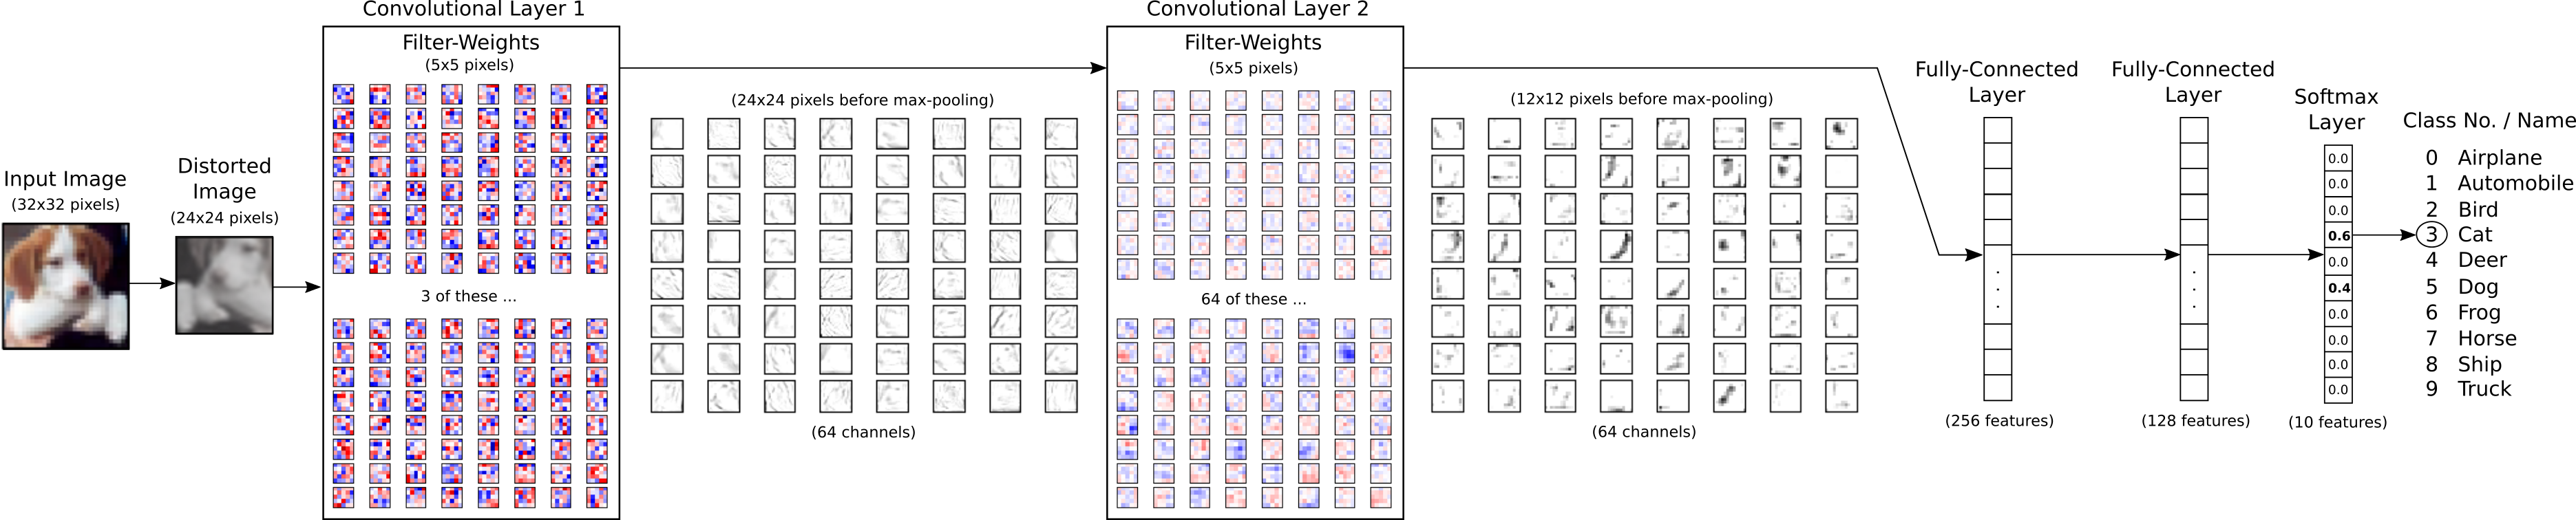

In [1]:
from IPython.display import Image
Image('image/network_flowchart.png')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import os

import sys
sys.path.append('./utility')


# Download CIFAR10 

download.maybe_download_and_extract(url=data_url, download_dir=data_path)

data_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

data_path = "data/CIFAR-10/"


In [3]:
import cifar10
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


# CIFAR 10 Attributres

## Classes in CIFAR10

In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

## Load Training Data

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5


In [6]:
print(images_train.shape)
print(labels_train.shape)
print(cls_train.shape)

(50000, 32, 32, 3)
(50000, 10)
(50000,)


In [7]:
images_test, cls_test, labels_test = cifar10.load_test_data()
print("Size of:")
print("- Training-set:\t\t{}".format(len(images_train)))
print("- Test-set:\t\t{}".format(len(images_test)))

Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch
Size of:
- Training-set:		50000
- Test-set:		10000


Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


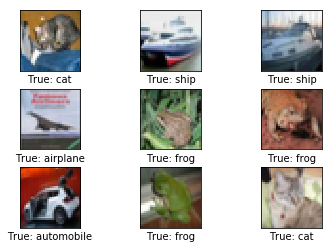

In [8]:
import help_function as h

# Get the first images from the test-set.
images = images_test[0:9]
# Get the true classes for those images.
cls_true = cls_test[0:9]
# Plot the images and labels using our helper-function above.
h.plot_images(images=images, cls_true=cls_true, smooth=False)


# Buildup Placeholder

In [9]:
from cifar10 import img_size, num_channels, num_classes
x = tf.placeholder(tf.float32, shape=[None, img_size, img_size, num_channels], name='x')
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

is_training = tf.placeholder(tf.bool, name='is_training')

# Main Architechture of Model

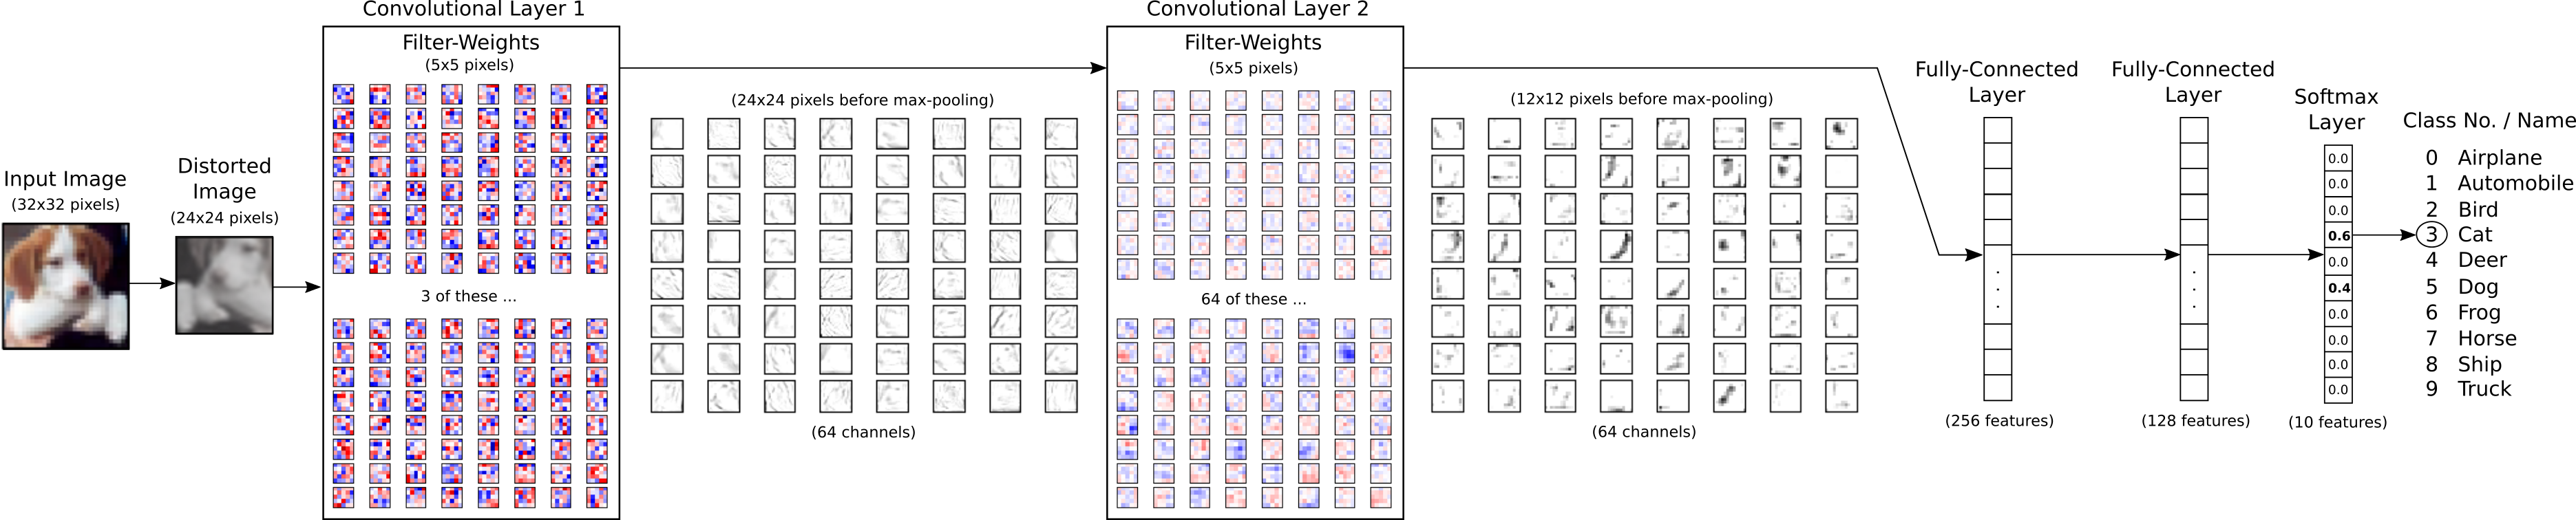

In [10]:
Image('image/network_flowchart.png')

## Create Network Variable

In [11]:
initializer = tf.truncated_normal_initializer(stddev=0.01, dtype=tf.float32)


with tf.variable_scope("network_var") as scope:
    try:
        conv1w = tf.get_variable('conv1w', [5,5,3,64], initializer=initializer)
        conv1b = tf.get_variable('conv1b', [64], initializer=initializer)
        
        conv2w = tf.get_variable('conv2w', [5,5,64,64], initializer=initializer)
        conv2b = tf.get_variable('conv2b', [64], initializer=initializer)
        
        fc3w = tf.get_variable('fc3w', [2304,256], initializer=initializer)
        fc3b = tf.get_variable('fc3b', [256], initializer=initializer)
        
        fc4w = tf.get_variable('fc4w', [256,128], initializer=initializer)
        fc4b = tf.get_variable('fc4b', [128], initializer=initializer)
        
        fc5w = tf.get_variable('fc5w', [128,10], initializer=initializer)
        fc5b = tf.get_variable('fc5b', [10], initializer=initializer)
            
    except:
        scope.reuse_variables()
        conv1w = tf.get_variable('conv1w', [5,5,3,64], initializer=initializer)
        conv1b = tf.get_variable('conv1b', [64], initializer=initializer)
        
        conv2w = tf.get_variable('conv2w', [5,5,64,64], initializer=initializer)
        conv2b = tf.get_variable('conv2b', [64], initializer=initializer)
        
        fc3w = tf.get_variable('fc3w', [2304,256], initializer=initializer)
        fc3b = tf.get_variable('fc3b', [256], initializer=initializer)
        
        fc4w = tf.get_variable('fc4w', [256,128], initializer=initializer)
        fc4b = tf.get_variable('fc4b', [128], initializer=initializer)
        
        fc5w = tf.get_variable('fc5w', [128,10], initializer=initializer)
        fc5b = tf.get_variable('fc5b', [10], initializer=initializer)
    
        
graph = tf.get_default_graph()
for op in graph.get_operations(): print(op.name)



x
y_true
ArgMax/dimension
ArgMax
is_training
network_var/conv1w/Initializer/truncated_normal/shape
network_var/conv1w/Initializer/truncated_normal/mean
network_var/conv1w/Initializer/truncated_normal/stddev
network_var/conv1w/Initializer/truncated_normal/TruncatedNormal
network_var/conv1w/Initializer/truncated_normal/mul
network_var/conv1w/Initializer/truncated_normal
network_var/conv1w
network_var/conv1w/Assign
network_var/conv1w/read
network_var/conv1b/Initializer/truncated_normal/shape
network_var/conv1b/Initializer/truncated_normal/mean
network_var/conv1b/Initializer/truncated_normal/stddev
network_var/conv1b/Initializer/truncated_normal/TruncatedNormal
network_var/conv1b/Initializer/truncated_normal/mul
network_var/conv1b/Initializer/truncated_normal
network_var/conv1b
network_var/conv1b/Assign
network_var/conv1b/read
network_var/conv2w/Initializer/truncated_normal/shape
network_var/conv2w/Initializer/truncated_normal/mean
network_var/conv2w/Initializer/truncated_normal/stddev
net

## Build Network

In [12]:
with tf.name_scope("network_test"):
    img = h.pre_process(images=x, training=is_training)
    net = tf.nn.conv2d(img, conv1w, strides=[1, 1, 1, 1], padding='SAME',name='conv1')
    net2 = tf.nn.conv2d(img, conv1w, strides=[1, 1, 1, 1], padding='VALID',name='conv1')
    
    print("Raw img:{}, Processed:{}".format(x.get_shape(), img.get_shape()))
    print("SAME:", net)
    print("VALID:", net2)

Raw img:(?, 32, 32, 3), Processed:(?, 24, 24, 3)
SAME: Tensor("network_test/conv1:0", shape=(?, 24, 24, 64), dtype=float32)
VALID: Tensor("network_test/conv1_1:0", shape=(?, 20, 20, 64), dtype=float32)


In [13]:
with tf.name_scope("network"):
    img = h.pre_process(images=x, training=is_training)
    
    net = tf.nn.conv2d(img, conv1w, strides=[1, 1, 1, 1], padding='SAME',name='conv1')
    net = tf.add(net,conv1b, name='add_bias1')
    net = tf.nn.relu(net, name='relu_1')
    
    net = tf.nn.max_pool(net, ksize=[1, 3, 3, 1],strides=[1, 2, 2, 1], padding='SAME')
    
    net = tf.nn.conv2d(net, conv2w, strides=[1, 1, 1, 1], padding='SAME',name='conv2')
    net = tf.add(net,conv2b, name='add_bias2')
    net = tf.nn.relu(net, name='relu_2')
    
    net = tf.nn.max_pool(net, ksize=[1, 3, 3, 1],strides=[1, 2, 2, 1], padding='SAME')
    
    print("Before reshape: ", net)
    reshape_net = tf.reshape(net, [-1, int(np.prod(net.get_shape()[1:]))])
    print("After reshape: ", reshape_net)
    
    
    net = tf.nn.relu(tf.add(tf.matmul(reshape_net,fc3w),fc3b))
    net = tf.nn.relu(tf.add(tf.matmul(net,fc4w),fc4b))
    logits = tf.add(tf.matmul(net,fc5w),fc5b)
    
    print("Final output: ", logits)

Before reshape:  Tensor("network/MaxPool_1:0", shape=(?, 6, 6, 64), dtype=float32)
After reshape:  Tensor("network/Reshape:0", shape=(?, 2304), dtype=float32)
Final output:  Tensor("network/Add_2:0", shape=(?, 10), dtype=float32)


## Loss Function

In [14]:
losses = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)  
loss = tf.reduce_mean(losses, name='loss') 
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss)

## Calculate Accuracy

In [15]:
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Start Runing your Session

In [16]:
session = tf.Session()
saver = tf.train.Saver() 
session.run(tf.global_variables_initializer())

In [17]:
save_dir = "./model"

try:
    print("Trying to restore last checkpoint ...")

    # Use TensorFlow to find the latest checkpoint - if any.
    last_chk_path = tf.train.latest_checkpoint(checkpoint_dir=save_dir)

    # Try and load the data in the checkpoint.
    saver.restore(session, save_path=last_chk_path)

    # If we get to this point, the checkpoint was successfully loaded.
    print("Restored checkpoint from:", last_chk_path)
except:
    # If the above failed for some reason, simply
    # initialize all the variables for the TensorFlow graph.
    print("Failed to restore checkpoint. Initializing variables instead.")
    session.run(tf.global_variables_initializer())

Trying to restore last checkpoint ...
Restored checkpoint from: ./model/network.ckpt-53500


## Determine Batch Size

In [20]:
train_batch_size = 64
num_iterations = 100000

## Start Training your model

In [21]:
start_time = time.time()

for i in range(num_iterations):
    # Get a batch of training examples.
    # x_batch now holds a batch of images and
    # y_true_batch are the true labels for those images.
    x_batch, y_true_batch = h.random_batch(images_train, labels_train, train_batch_size)

    # Put the batch into a dict with the proper names
    # for placeholder variables in the TensorFlow graph.
    feed_dict_train = {x: x_batch,
                       y_true: y_true_batch,
                          is_training:True}

    # Run the optimizer using this batch of training data.
    # TensorFlow assigns the variables in feed_dict_train
    # to the placeholder variables and then runs the optimizer.
    # We also want to retrieve the global_step counter.
    session.run( optimizer,feed_dict=feed_dict_train)

    # Print status to screen every 100 iterations (and last).
    if (i % 100 == 0) or (i == num_iterations - 1):
        # Calculate the accuracy on the training-batch.
        batch_acc = session.run(accuracy,
                                feed_dict=feed_dict_train)

        # Print status.
        msg = "Global Step: {0:>6}, Training Batch Accuracy: {1:>6.1%}"
        print(msg.format(i, batch_acc))

    # Save a checkpoint to disk every 1000 iterations (and last).
    if (i % 500 == 0) or (i == num_iterations - 1):
        # Save all variables of the TensorFlow graph to a
        # checkpoint. Append the global_step counter
        # to the filename so we save the last several checkpoints.
        saver.save(session,
                   save_path=os.path.join(save_dir, "network.ckpt"),
                   global_step=i)

        print("Saved checkpoint.")

# Ending time.
end_time = time.time()

# Difference between start and end-times.
time_dif = end_time - start_time

# Print the time-usage.
print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

Global Step:      0, Training Batch Accuracy:  73.4%
Saved checkpoint.
Global Step:    100, Training Batch Accuracy:  75.0%
Global Step:    200, Training Batch Accuracy:  70.3%
Global Step:    300, Training Batch Accuracy:  70.3%
Global Step:    400, Training Batch Accuracy:  70.3%
Global Step:    500, Training Batch Accuracy:  64.1%
Saved checkpoint.
Global Step:    600, Training Batch Accuracy:  71.9%
Global Step:    700, Training Batch Accuracy:  67.2%
Global Step:    800, Training Batch Accuracy:  64.1%
Global Step:    900, Training Batch Accuracy:  71.9%
Global Step:   1000, Training Batch Accuracy:  82.8%
Saved checkpoint.
Global Step:   1100, Training Batch Accuracy:  59.4%
Global Step:   1200, Training Batch Accuracy:  59.4%
Global Step:   1300, Training Batch Accuracy:  70.3%
Global Step:   1400, Training Batch Accuracy:  73.4%
Global Step:   1500, Training Batch Accuracy:  68.8%
Saved checkpoint.
Global Step:   1600, Training Batch Accuracy:  57.8%
Global Step:   1700, Traini

# Predict Test Class  & Plot Results

In [97]:
# Split the data-set in batches of this size to limit RAM usage.
batch_size = 256

def predict_cls(images, labels, cls_true):
    # Number of images.
    num_images = len(images)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_images, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_images:
        # The ending index for the next batch is denoted j.
        j = min(i + batch_size, num_images)

        # Create a feed-dict with the images and labels
        # between index i and j.
        feed_dict = {x: images[i:j, :],
                     y_true: labels[i:j, :],
                     is_training:True}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    return correct, cls_pred

In [98]:
def predict_cls_test():
    return predict_cls(images = images_test,
                       labels = labels_test,
                       cls_true = cls_test)

In [99]:
def classification_accuracy(correct):
    # When averaging a boolean array, False means 0 and True means 1.
    # So we are calculating: number of True / len(correct) which is
    # the same as the classification accuracy.
    
    # Return the classification accuracy
    # and the number of correct classifications.
    return correct.mean(), correct.sum()

In [119]:
# For all the images in the test-set,
# calculate the predicted classes and whether they are correct.
correct, cls_pred = predict_cls_test()
# Classification accuracy and the number of correct classifications.
acc, num_correct = classification_accuracy(correct)

# Number of images being classified.
num_images = len(correct)

# Print the accuracy.
msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
print(msg.format(acc, num_correct, num_images))

[ True  True  True ...,  True  True  True]
Accuracy on Test-Set: 49.4% (4940 / 10000)


In [101]:
def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = images_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = cls_test[incorrect]
    
    # Plot the first 9 images.
    h.plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

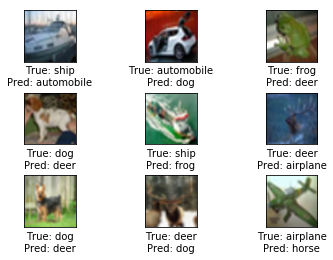

In [102]:
plot_example_errors(cls_pred=cls_pred, correct=correct)

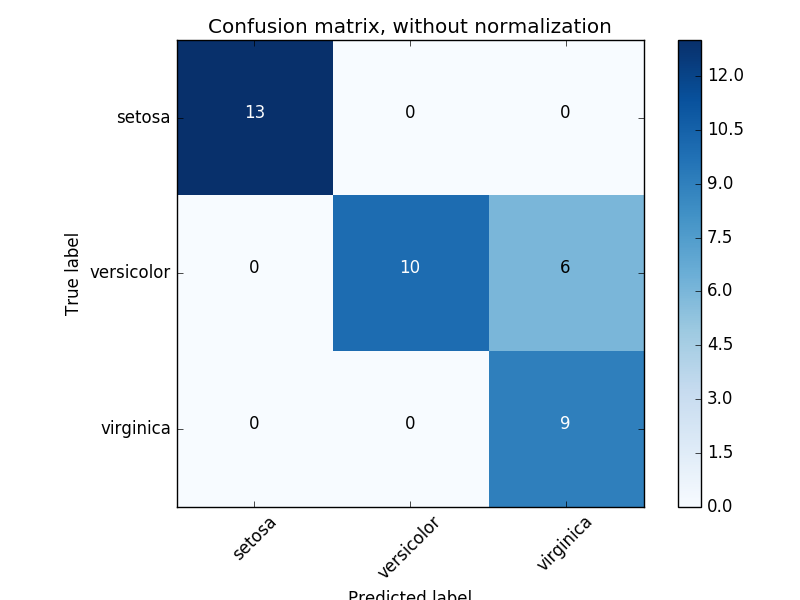

In [103]:
Image('image/confusion_matrix.png')

In [104]:
def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_test,  # True class for test-set.
                          y_pred=cls_pred)  # Predicted class.

    # Print the confusion matrix as text.
    for i in range(num_classes):
        # Append the class-name to each confusion_matrixline.
        class_name = "({}) {}".format(i, class_names[i])
        print(cm[i, :], class_name)

    # Print the class-numbers for easy reference.
    class_numbers = [" ({0})".format(i) for i in range(num_classes)]
    print("".join(class_numbers))

In [105]:
print("Confusion Matrix:")
plot_confusion_matrix(cls_pred=cls_pred)

Confusion Matrix:
[530  42  32  17  14  11  10  15 261  68] (0) airplane
[ 43 606   3  11  14   5  11   8 153 146] (1) automobile
[133  32 196  91 146 115  78  86  71  52] (2) bird
[ 41  26  43 254  49 237  96  73  81 100] (3) cat
[ 79  43  69  66 261  62 101 212  39  68] (4) deer
[ 28  32  44 173  53 428  48  93  40  61] (5) dog
[ 16  30  31  87  78  36 609  17  38  58] (6) frog
[ 29  20  14  50  54  99  11 579  15 129] (7) horse
[ 88  36   5  11   3   6   4   8 767  72] (8) ship
[ 43 119   3  16   7   3  11  37 129 632] (9) truck
 (0) (1) (2) (3) (4) (5) (6) (7) (8) (9)


# Plot Convolution Weight

In [106]:
for op in graph.get_operations(): print(op.name)

x
y_true
ArgMax/dimension
ArgMax
is_training
network_var/conv1w/Initializer/truncated_normal/shape
network_var/conv1w/Initializer/truncated_normal/mean
network_var/conv1w/Initializer/truncated_normal/stddev
network_var/conv1w/Initializer/truncated_normal/TruncatedNormal
network_var/conv1w/Initializer/truncated_normal/mul
network_var/conv1w/Initializer/truncated_normal
network_var/conv1w
network_var/conv1w/Assign
network_var/conv1w/read
network_var/conv1b/Initializer/truncated_normal/shape
network_var/conv1b/Initializer/truncated_normal/mean
network_var/conv1b/Initializer/truncated_normal/stddev
network_var/conv1b/Initializer/truncated_normal/TruncatedNormal
network_var/conv1b/Initializer/truncated_normal/mul
network_var/conv1b/Initializer/truncated_normal
network_var/conv1b
network_var/conv1b/Assign
network_var/conv1b/read
network_var/conv2w/Initializer/truncated_normal/shape
network_var/conv2w/Initializer/truncated_normal/mean
network_var/conv2w/Initializer/truncated_normal/stddev
net

In [107]:
def get_weights_variable(varible_name):
    # Retrieve an existing variable named 'weights' in the scope
    # with the given layer_name.
    # This is awkward because the TensorFlow function was
    # really intended for another purpose.

    with tf.variable_scope("network_var",reuse=True):
        variable = tf.get_variable(varible_name)

    return variable

weights_conv1 = get_weights_variable(varible_name ='conv1w')
weights_conv2 = get_weights_variable(varible_name ='conv2w')

In [108]:
def plot_conv_weights(weights, input_channel=0):
    # Assume weights are TensorFlow ops for 4-dim variables
    # e.g. weights_conv1 or weights_conv2.

    # Retrieve the values of the weight-variables from TensorFlow.
    # A feed-dict is not necessary because nothing is calculated.
    w = session.run(weights)

    # Print statistics for the weights.
    print("Min:  {0:.5f}, Max:   {1:.5f}".format(w.min(), w.max()))
    print("Mean: {0:.5f}, Stdev: {1:.5f}".format(w.mean(), w.std()))
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)
    abs_max = max(abs(w_min), abs(w_max))

    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # The format of this 4-dim tensor is determined by the
            # TensorFlow API. See Tutorial #02 for more details.
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=-abs_max, vmax=abs_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Min:  -0.06610, Max:   0.06305
Mean: -0.00034, Stdev: 0.01940


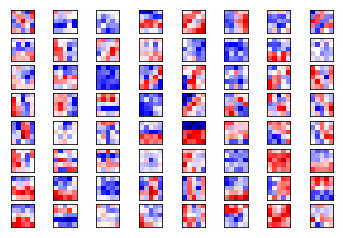

In [109]:
plot_conv_weights(weights=weights_conv1, input_channel=0)

Min:  -0.29111, Max:   0.21174
Mean: -0.00191, Stdev: 0.03159


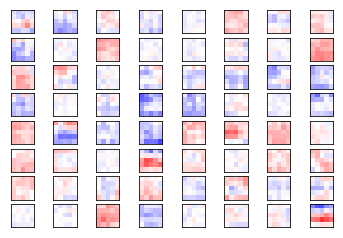

In [111]:
plot_conv_weights(weights=weights_conv2, input_channel=0)

# Plot image after convolution

In [112]:
def plot_image(image):
    # Create figure with sub-plots.
    fig, axes = plt.subplots(1, 2)

    # References to the sub-plots.
    ax0 = axes.flat[0]
    ax1 = axes.flat[1]

    # Show raw and smoothened images in sub-plots.
    ax0.imshow(image, interpolation='nearest')
    ax1.imshow(image, interpolation='spline16')

    # Set labels.
    ax0.set_xlabel('Raw')
    ax1.set_xlabel('Smooth')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

def get_test_image(i):
    return images_test[i, :, :, :], cls_test[i]


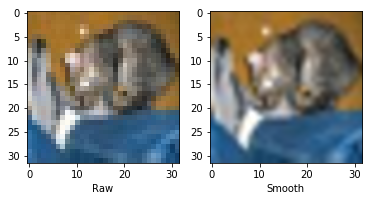

In [120]:
img, cls = get_test_image(0)
plot_image(img)

In [121]:
def get_layer_output(layer_name):
    # The name of the last operation of the convolutional layer.
    # This assumes you are using Relu as the activation-function.
    tensor_name = "network/"+layer_name +":0"

    # Get the tensor with this name.
    tensor = tf.get_default_graph().get_tensor_by_name(tensor_name)

    return tensor

In [122]:
output_conv1 = get_layer_output(layer_name='relu_1')
output_conv2 = get_layer_output(layer_name='relu_2')

In [123]:
def plot_layer_output(layer_output, image):
    # Assume layer_output is a 4-dim tensor
    # e.g. output_conv1 or output_conv2.

    # Create a feed-dict which holds the single input image.
    # Note that TensorFlow needs a list of images,
    # so we just create a list with this one image.
    feed_dict = {x: [image], is_training:False}
    
    # Retrieve the output of the layer after inputting this image.
    values = session.run(layer_output, feed_dict=feed_dict)
    print(layer_output)

    # Get the lowest and highest values.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    values_min = np.min(values)
    values_max = np.max(values)

    # Number of image channels output by the conv. layer.
    num_images = values.shape[3]

    # Number of grid-cells to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_images))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid image-channels.
        if i<num_images:
            # Get the images for the i'th output channel.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, vmin=values_min, vmax=values_max,
                      interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Tensor("network/relu_1:0", shape=(?, 24, 24, 64), dtype=float32)


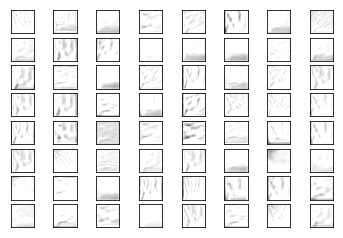

In [124]:
plot_layer_output(output_conv1, image=img)

Tensor("network/relu_2:0", shape=(?, 12, 12, 64), dtype=float32)


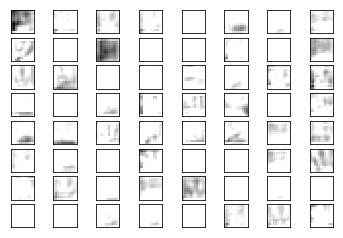

In [125]:
plot_layer_output(output_conv2, image=img)